In [89]:
import numpy as np
import matplotlib.pyplot as plt

In [90]:
import matplotlib
font = {'size'   : 22}

matplotlib.rc('font', **font)

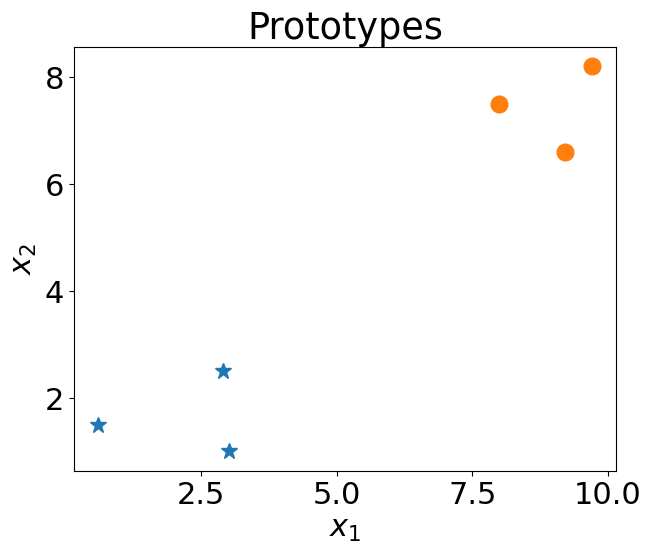

In [91]:
x = np.array([0.6, 2.9, 3])
x2 = np.array([8, 9.2, 9.7])
y = np.array([1.5, 2.5, 1])
y2 = np.array([7.5, 6.6, 8.2])

plt.figure(figsize=(7, 5.5))
plt.plot(x,y, '*', markersize=12)
plt.plot(x2, y2, 'o', markersize=12)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Prototypes')
plt.savefig('../src/images/prototypes_0.eps')

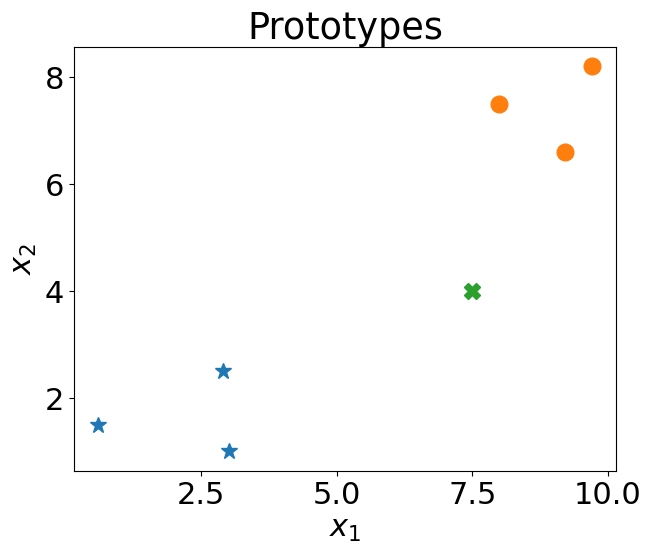

In [92]:
x = np.array([0.6, 2.9, 3])
x2 = np.array([8, 9.2, 9.7])
y = np.array([1.5, 2.5, 1])
y2 = np.array([7.5, 6.6, 8.2])
x3 = np.array([7.5])
y3 = np.array([4.0])

plt.figure(figsize=(7, 5.5))
plt.plot(x,y, '*', markersize=12)
plt.plot(x2, y2, 'o', markersize=12)
plt.plot(x3, y3, 'X', markersize=12)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Prototypes')
plt.savefig('../src/images/prototypes_1.eps')

<Figure size 700x550 with 0 Axes>

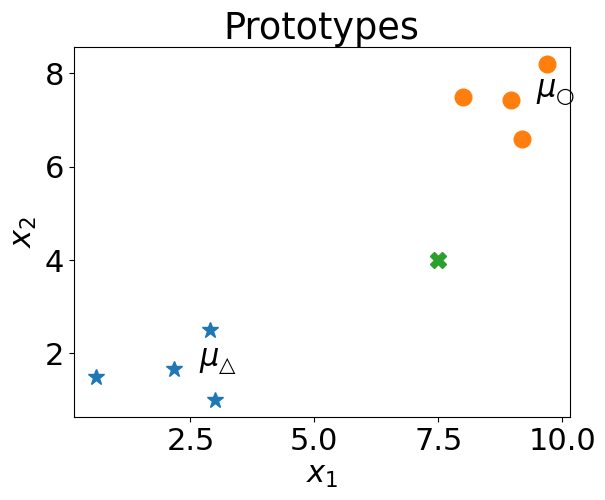

In [93]:
x = np.array([0.6, 2.9, 3])
x2 = np.array([8, 9.2, 9.7])
y = np.array([1.5, 2.5, 1])
y2 = np.array([7.5, 6.6, 8.2])
x3 = np.array([7.5])
y3 = np.array([4.0])

mu1x = x.mean()
mu1y = y.mean()

mu2x = x2.mean()
mu2y = y2.mean()

plt.figure(figsize=(7, 5.5))
fig, ax = plt.subplots()
ax.plot(x,y, '*', color='C0', markersize=12)
ax.plot(mu1x, mu1y, '*', color='C0', markersize=12)
ax.annotate('$\mu_{\\bigtriangleup}$', (mu1x+.5, mu1y+0.05))
ax.plot(x2, y2, 'o',color='C1', markersize=12)
ax.plot(mu2x, mu2y, 'o', color='C1', markersize=12)
ax.annotate('$\mu_{\\bigcirc}$', (mu2x+.5, mu2y+0.05))
ax.plot(x3, y3, 'X', color='C2', markersize=12)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Prototypes')
plt.savefig('../src/images/prototypes_2.eps')

In [94]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('*', 'o', 'x', '^', 'v')
    colors = ('C0', 'C1', 'C2', 'C3', 'C4')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    s=120, 
                    label=cl)
                    #edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    #edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=200, 
                    label='test set')

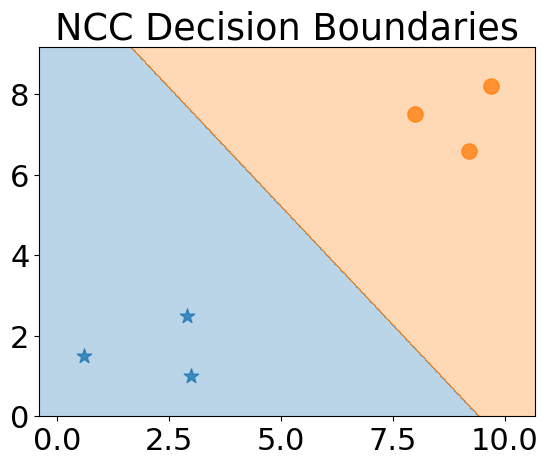

In [95]:
from sklearn.neighbors import NearestCentroid

clf = NearestCentroid()
X = np.concatenate([x, x2])
Y = np.concatenate([y, y2])
X = np.c_[X, Y]
Y = [0,0,0,1,1,1]
clf.fit(X, Y)

plot_decision_regions(X, Y, clf)
plt.title("NCC Decision Boundaries")
plt.savefig('../src/images/NCC_DBs_0.svg', transparent=True)
plt.show()

In [99]:
a = 2.1
b = 1.2
c = 1
d = 3.2
e = 1e-4
x = np.random.rand(50, 1)
y = np.random.rand(50, 1)

z = y - a*np.sin(b*x + c) + d*x + e

In [100]:
clf = NearestCentroid()
clf.fit(np.c_[x, y], [0] * 25 + [1] * 25)

NearestCentroid()

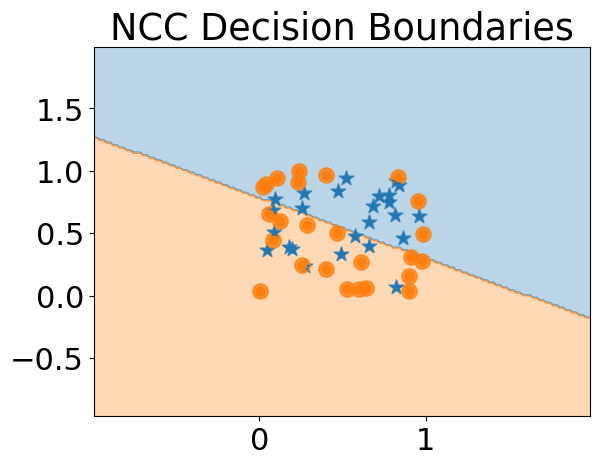

In [102]:
plt.plot(x[:25], y[:25], '*')
plt.plot(x[25:], y[25:], 'o')

plot_decision_regions(np.c_[x, y], [0] * 25 + [1] * 25, clf)
plt.title("NCC Decision Boundaries")
plt.savefig('../src/images/NCC_DBs_1.svg', transparent=True)
plt.show()